In [1]:
from IPython.display import HTML, Image, YouTubeVideo
from graphviz import Graph

# MSDS688 - Artifical Intelligence

## Week 3 - Adversarial Games

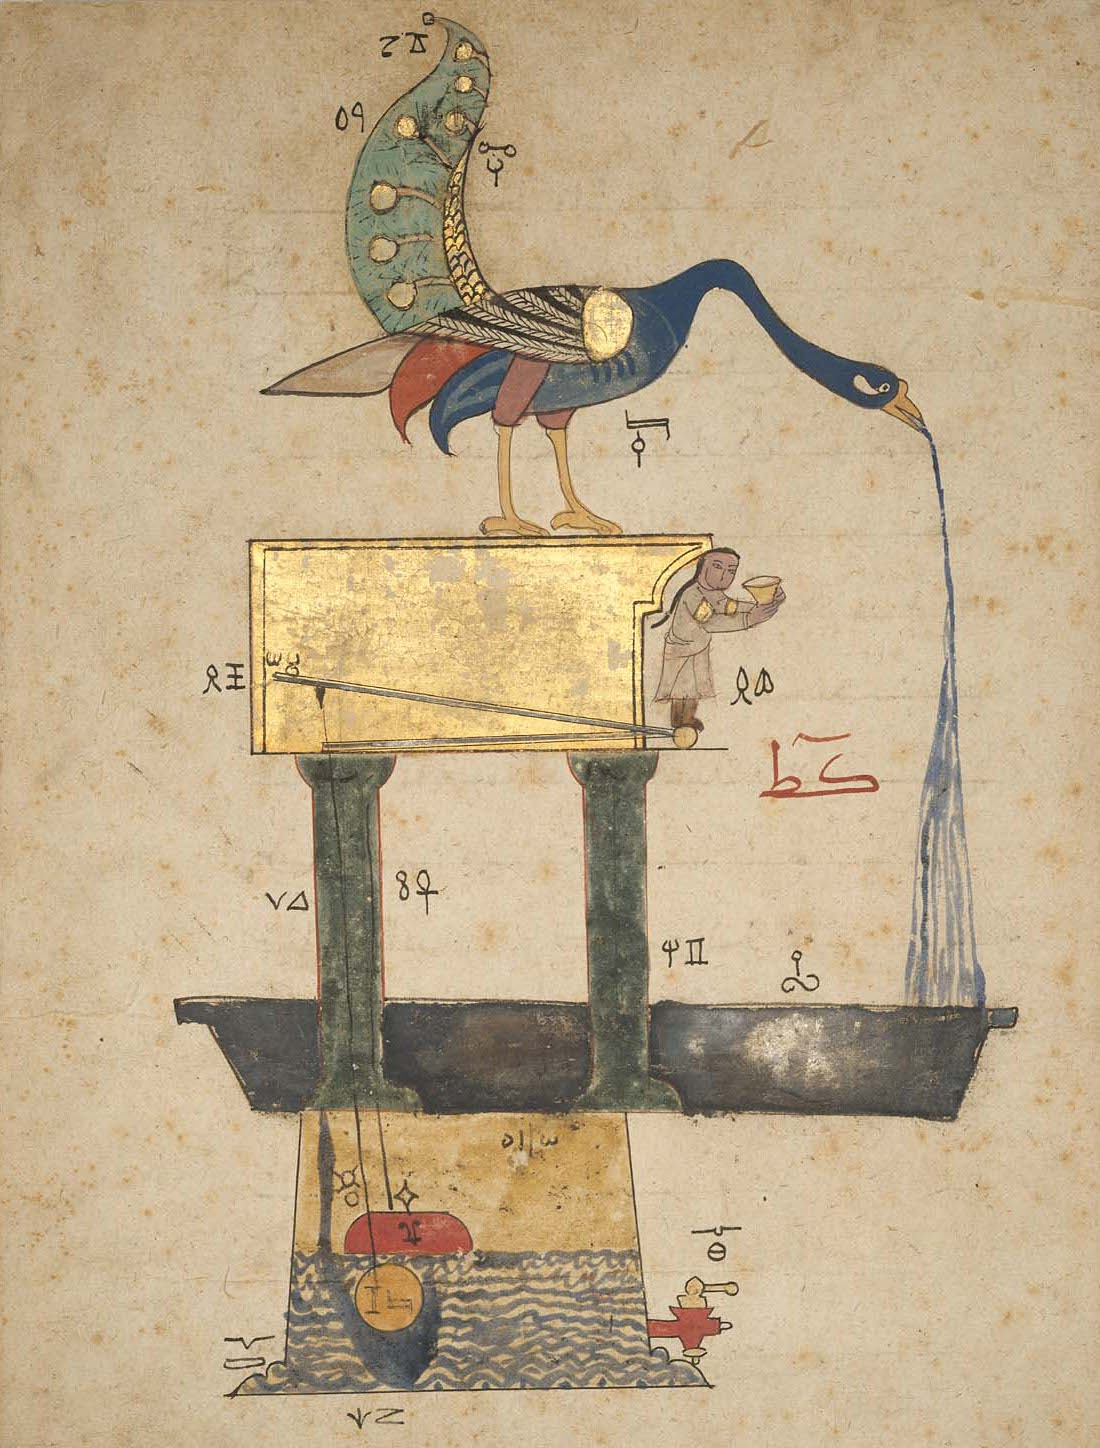

In [2]:
Image('images/peacock_fountain.jpg')

Such hydraulic automata became ubiquitous on the grounds of palaces and wealthy estates. So-called “frolicsome engines” were to be found as early as the late thirteenth century at the French chateau of Hesdin, the account books of which mention mechanical monkeys, “an elephant and a he-goat”.1 Over the next two centuries, the chateau collection expanded to include “3 personnages that spout water and wet people at will”.

Cite: Riskin, J. (n.d.). Frolicsome Engines: The Long Prehistory of Artificial Intelligence. Retrieved April 10, 2018, from [https://publicdomainreview.org/2016/05/04/frolicsome-engines-the-long-prehistory-of-artificial-intelligence/](https://publicdomainreview.org/2016/05/04/frolicsome-engines-the-long-prehistory-of-artificial-intelligence/)

# Tonight

* Review of search
* Quiz
* Lecture -- Applying search to playing games
* Break
* Exercise
* Go over the assignment -- Searching for best routes across Colorado
* Office hours / coding questions

Today we will learn how AI can be used to play games with two players

## Learning objectives

1. Explain the minmax and alpha-beta algorithms and be able to apply it to simple games.

1. Diagram the search tree it generated by minmax search.

1. Quantify the effect that alpha-beta pruning has on search tree.

1. Summarize how and why optimal game play differs from what is practical.

1. Develop working code that implements two different search algorithms.

# Lecture: Adversarial search

## Concept: Minimax algorithm

* Imagine a two-player game

* MAX --> Always wants the HIGHEST score possible

* MIN --> Always wants the LOWEST score possible

* They take turns giving each other the worst scores possible

## Example of minimax

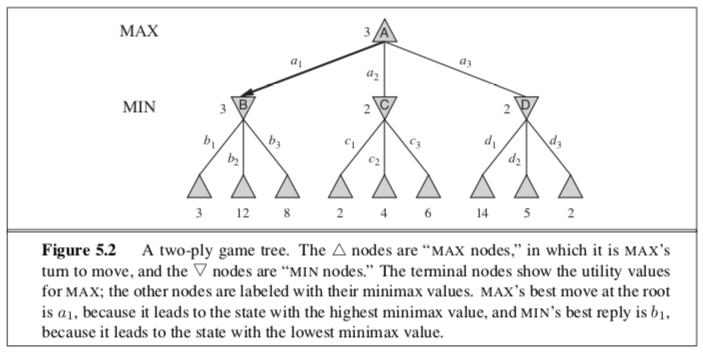

In [5]:
Image('images/Figure-S5-2-minmax-tree-example.png')

## Minimax characteristics

* Based on DFS
* Searches to constant depth
* Evaluates each board at that depth
* Number of evaluated nodes grows exponentially
    * b == branching factor with one branch per action
    * d == depth 
    * Number of evaluated nodes = b^d
* MIN and MAX must take what the other gives

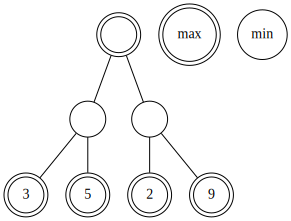

In [6]:
# Note: jupyter lab doesn't render graphs as of July 2018, you MUST use the notebook
f = Graph(strict=True)

f.attr('node', shape='doublecircle')
f.node('a', label='')
f.node('max')

f.attr('node', shape='circle')
f.node('b', label='')
f.node('c', label='')
f.node('min')

f.attr('node', shape='doublecircle')
f.node('d', label='3')
f.node('e', label='5')
f.node('f', label='2')
f.node('g', label='9')

f.edge('a', 'b')
f.edge('a', 'c')
f.edge('b', 'd')
f.edge('b', 'e')
f.edge('c', 'f')
f.edge('c', 'g')

f

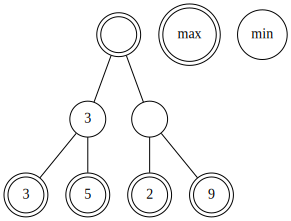

In [7]:
f.node('b', label='3')
f

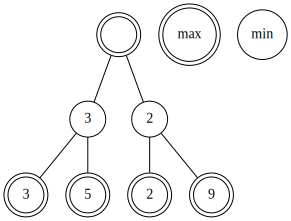

In [8]:
f.node('c', label='2')
f

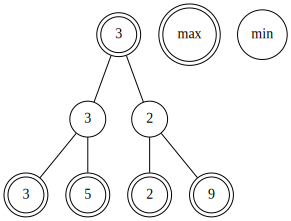

In [9]:
f.node('a', label='3')
f

## Minimax exercise

* Work through the problem on paper
* After you are done find a partner 
* Come to consensus and share your answer with me

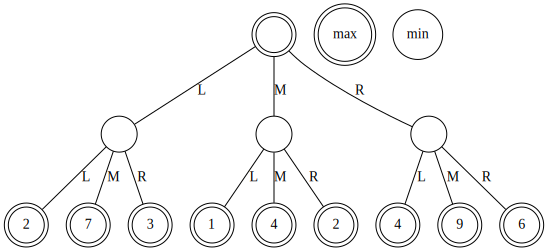

In [10]:
g = Graph()

g.attr('node', shape='doublecircle')
g.node('a', label='')
g.node('max')

g.attr('node', shape='circle')
g.node('b', label='')
g.node('c', label='')
g.node('d', label='')
g.node('min')

g.attr('node', shape='doublecircle')
g.node('e', label='2')
g.node('f', label='7')
g.node('g', label='3')
g.node('h', label='1')
g.node('i', label='4')
g.node('j', label='2')
g.node('k', label='4')
g.node('l', label='9')
g.node('m', label='6')

g.edge('a', 'b', label='L')
g.edge('a', 'c', label='M')
g.edge('a', 'd', label='R')
g.edge('b', 'e', label='L')
g.edge('b', 'f', label='M')
g.edge('b', 'g', label='R')
g.edge('c', 'h', label='L')
g.edge('c', 'i', label='M')
g.edge('c', 'j', label='R')
g.edge('d', 'k', label='L')
g.edge('d', 'l', label='M')
g.edge('d', 'm', label='R')
g

## Minimax in action

* During game play the greater the number of moves a player can anticipate the better

* Chess example
    - 8 moves out produces pedestrian play
    - 15 moves out is championship caliber play
    - 30 moves / player
    - 30^15 = 10^22  

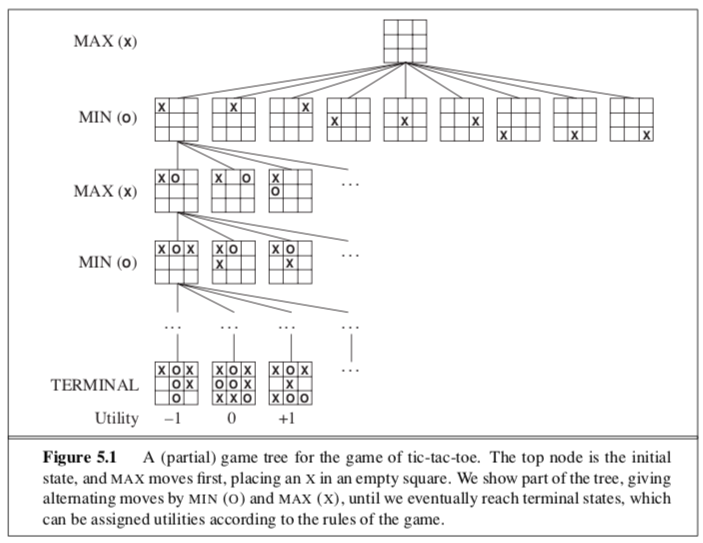

In [20]:
Image('images/Figure-S5-1-minmax-example.png')

# MiniMax algorithm

__function__ MINIMAX-DECISION(_state_) __returns__ _an action_  
&emsp;__return__ arg max<sub> _a_ &Element; ACTIONS(_s_)</sub> MIN\-VALUE(RESULT(_state_, _a_))  

---
__function__ MAX\-VALUE(_state_) __returns__ _a utility value_  
&emsp;__if__ TERMINAL\-TEST(_state_) __then return__ UTILITY(_state_)  
&emsp;_v_ &larr; &minus;&infin;  
&emsp;__for each__ _a_ __in__ ACTIONS(_state_) __do__  
&emsp;&emsp;&emsp;_v_ &larr; MAX(_v_, MIN\-VALUE(RESULT(_state_, _a_)))  
&emsp;__return__ _v_  

---
__function__ MIN\-VALUE(_state_) __returns__ _a utility value_  
&emsp;__if__ TERMINAL\-TEST(_state_) __then return__ UTILITY(_state_)  
&emsp;_v_ &larr; &infin;  
&emsp;__for each__ _a_ __in__ ACTIONS(_state_) __do__  
&emsp;&emsp;&emsp;_v_ &larr; MIN(_v_, MAX\-VALUE(RESULT(_state_, _a_)))  
&emsp;__return__ _v_  

---


# Alpha-Beta idea

* Alpha-Beta is layered on top of minimax

* Remember that minimax search is depth-first

* Only consider nodes along a single path

* Alpha–beta pruning uses two parameters describing the bounds on backed-up values found along the path:

    - α = highest-value found so far for MAX along path.

    - β = lowest-value found so far for MIN along path.
    
* Once a better play has been found, prune all other branches as high in the tree as possible.

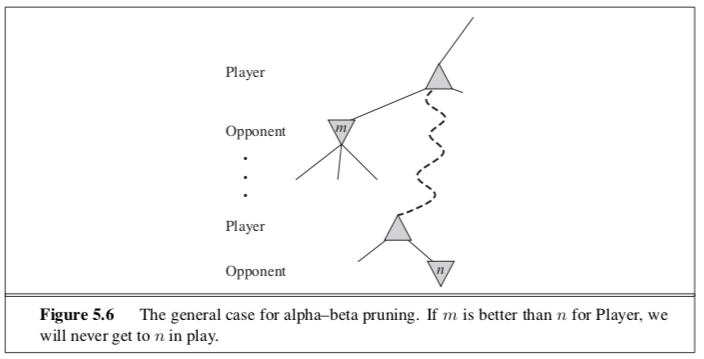

In [21]:
Image('images/Figure-S5-6-alphabeta-pruning-idea.png')

# Example

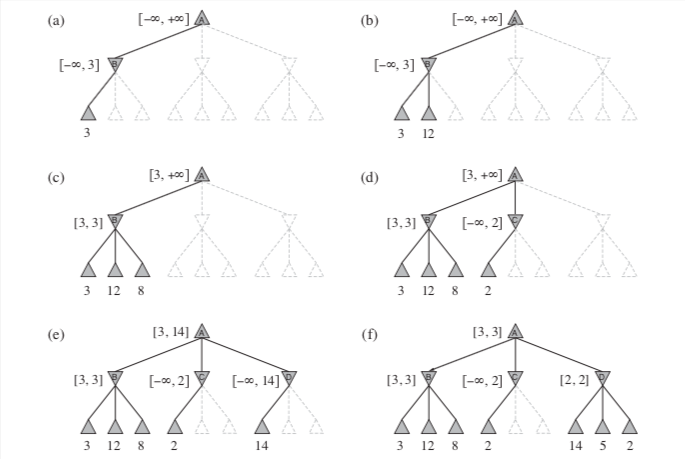

In [22]:
Image('images/Figure-S5-5-alphpabeta-pruning-example.png')

## Example -- Alpha Beta

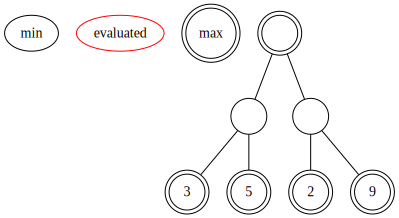

In [23]:
# Note: jupyter lab doesn't render graphs as of July 2018, you MUST use the notebook
h = Graph(strict=True)

h.node('min')
h.node('evaluated', color='red')

h.attr('node', shape='doublecircle')
h.node('max')
h.node('a', label='')


h.attr('node', shape='circle')
h.node('b', label='')
h.node('c', label='')


h.attr('node', shape='doublecircle')
h.node('d', label='3')
h.node('e', label='5')
h.node('f', label='2')
h.node('g', label='9')

h.edge('a', 'b')
h.edge('a', 'c')
h.edge('b', 'd')
h.edge('b', 'e')
h.edge('c', 'f')
h.edge('c', 'g')

h

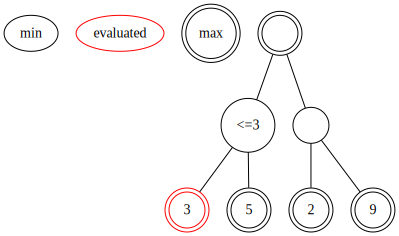

In [24]:
h.node('d', color='red')
h.node('b', label=' <=3')
h

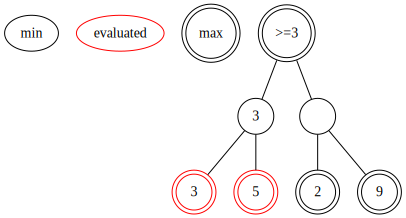

In [25]:
h.node('e', color='red')
h.node('b', label='3')
h.node('a', label='>=3')
h

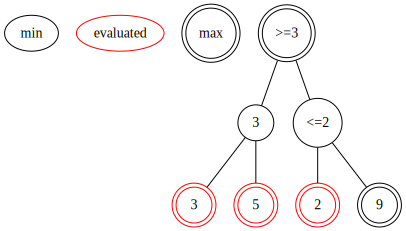

In [26]:
h.node('c', label='<=2')
h.node('f', color='red')
h.node('g', label='9')
h

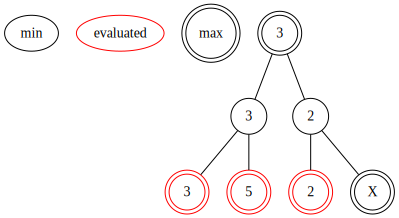

In [27]:
h.node('g', label='X')
h.node('c', label='2')
h.node('a', label='3')
h

# Break 

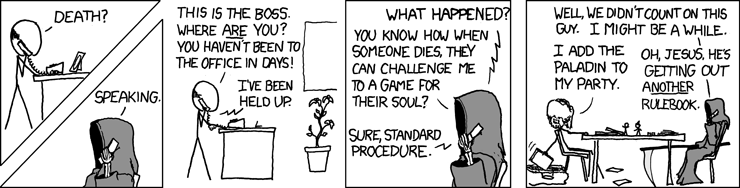

In [28]:
Image('https://imgs.xkcd.com/comics/ultimate_game.png')

## Demonstration

**See Worldclass > Content > Assignments > week-3-search-assignment.ipynb**

# Exercise - Alpha-Beta

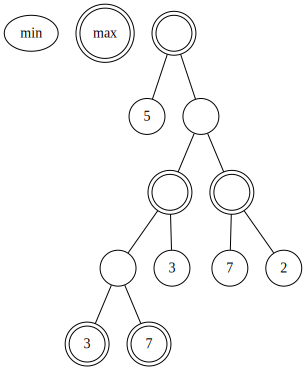

In [29]:
i = Graph(strict=True)

i.node('min')
i.attr('node', shape='doublecircle')
i.node('max')
i.node('a', label='')

i.attr('node', shape='circle')
i.node('b', label='5')
i.node('c', label='')

i.attr('node', shape='doublecircle')
i.node('d', label='')
i.node('e', label='')

i.attr('node', shape='circle')
i.node('f', label='')
i.node('g', label='3')
i.node('h', label='7')
i.node('i', label='2')

i.attr('node', shape='doublecircle')
i.node('j', label='3')
i.node('k', label='7')

i.edge('a', 'b')
i.edge('a', 'c')
i.edge('c', 'd')
i.edge('c', 'e')
i.edge('d', 'f')
i.edge('d', 'g')
i.edge('e', 'h')
i.edge('e', 'i')
i.edge('f', 'j')
i.edge('f', 'k')

i

# Summary


## Minimax characteristics

* Based on DFS
* Searches to constant depth
* Evaluates each board at that depth
* Number of evaluated nodes grows exponentially
    * b == branching factor with one branch per action
    * m == depth 
    * Number of evaluated nodes = b^m
* MIN and MAX must take what the other gives

## Example of minimax

![MinMax search tree example](images/Figure-S5-2-minmax-tree-example.png)

# Alpha-Beta idea

* Alpha-Beta is layered on top of minimax

* Remember that minimax search is depth-first

* Only consider nodes along a single path

* Alpha–beta pruning uses two parameters describing the bounds on backed-up values found along the path:

    - α = highest-value found so far for MAX along path.

    - β = lowest-value found so far for MIN along path.
    
* Once a better play has been found, prune all other branches as high in the tree as possible.

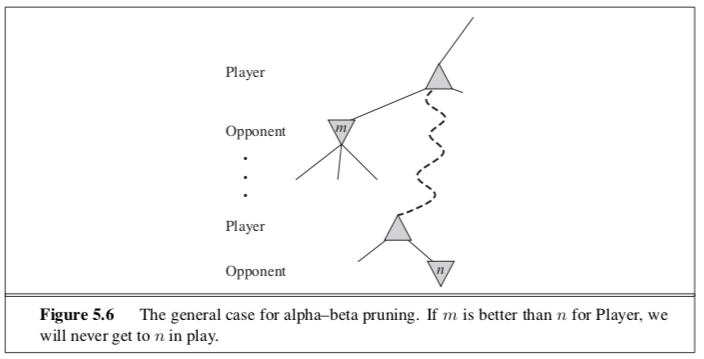

In [30]:
Image('images/Figure-S5-6-alphabeta-pruning-idea.png')

# Example

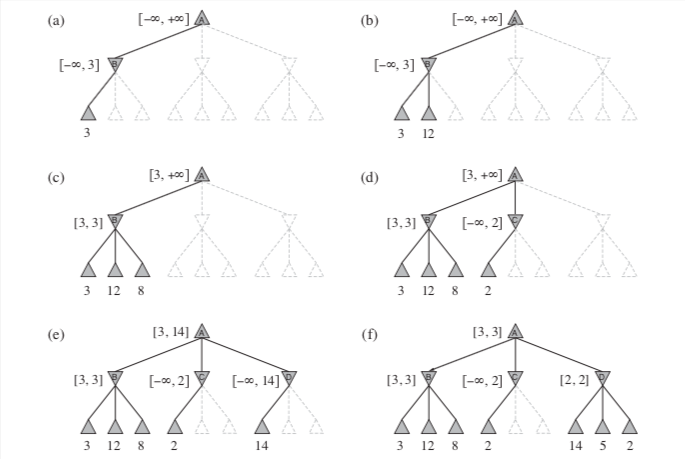

In [31]:
Image('images/Figure-S5-5-alphpabeta-pruning-example.png')